In [1]:
#Import all important libraries needed for project

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud
import re

In [2]:
# Read the entire csv file into dataframe
main_data = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t' )

/Users/vingadgil/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
main_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000027205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
main_data.shape

(91060, 159)

#### Get all Column List in the Dataset

In [5]:
# get col names
col_names = main_data.columns.values.tolist()
col_names

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

### Get Nutritional Score for France and Uk

In [9]:
# Get nutritional score 
data_nut_score = main_data[['product_name','countries_en','nutrition-score-fr_100g','nutrition-score-uk_100g']]
data_nut_score.columns = ['product_name','countries_en','fr_score','uk_score']

data_nut_score = data_nut_score[data_nut_score.fr_score.notnull()]
data_nut_score

,product_name,countries_en,fr_score,uk_score
17,Luxury Christmas Pudding,United Kingdom,10.0,10.0
18,Luxury Christmas Pudding,United Kingdom,10.0,10.0
20,"Pepsi, Nouveau goût !",France,13.0,2.0
26,7Up,France,13.0,2.0
32,Cakes aux Fruits,France,12.0,12.0
37,Sour Fruit Gummies,Germany,14.0,14.0
38,Jelly Fish,Germany,6.0,6.0
45,30 Panach' Fruits,France,13.0,13.0
61,Marks & Spencer Curiously Strong Mints,"France,United Kingdom",20.0,14.0
63,All Buter Belgian White Chocolate Chunk Cookies,France,26.0,26.0


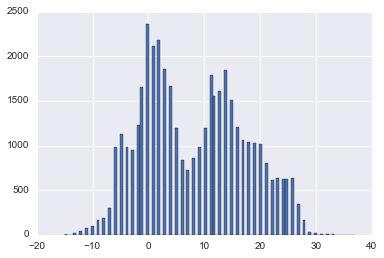

In [189]:
data_nut_score.fr_score.hist(bins=100)

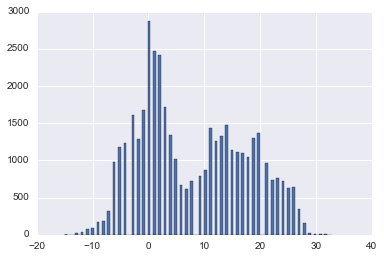

In [190]:
data_nut_score.uk_score.hist(bins=100)

### Number of Unique Records in columns, Total number of Records

In [5]:
# Using only certain columns from the file- find the total number of entries for each column
col_names = ['code',
 'product_name',
 'quantity',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'labels',
 'labels_en',
 'countries',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces_en',
 'additives_n',
 'additives_en',
 'nutrition_grade_uk',
 'nutrition_grade_fr',
 'main_category',
 'main_category_en',
 'energy_100g',
 'fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [6]:
# for each col get missing percentage
for name in col_names:
    target_var = name
    count = len(main_data[main_data[target_var].notnull()])
    count_unique = len(main_data[target_var].unique())
    
    print ("##############")
    print (target_var)
    print ("##############")
    print ("--------------")
    print ("Total Not Null records = " + str(count))
    print ("Total no of unique records = " + str(count_unique))
    print ("..............")
    print (" ")
    

##############
code
##############
--------------
Total Not Null records = 91040
Total no of unique records = 91041
..............
 
##############
product_name
##############
--------------
Total Not Null records = 80246
Total no of unique records = 66442
..............
 
##############
quantity
##############
--------------
Total Not Null records = 74504
Total no of unique records = 10810
..............
 
##############
brands
##############
--------------
Total Not Null records = 77493
Total no of unique records = 22618
..............
 
##############
brands_tags
##############
--------------
Total Not Null records = 77489
Total no of unique records = 18385
..............
 
##############
categories
##############
--------------
Total Not Null records = 64825
Total no of unique records = 29629
..............
 
##############
categories_tags
##############
--------------
Total Not Null records = 64805
Total no of unique records = 17227
..............
 
##############
categories_en
##

### Find the top 10 countries updated in the dataset

In [7]:
def no_null_objects(data, columns=None):
    """
    selects rows with no NaNs
    """
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

def splitDataFrameList(df, target_column, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [8]:
food_countries = splitDataFrameList(no_null_objects(main_data, ["countries_en"]), "countries_en", ",")
countries = food_countries["countries_en"].value_counts()

In [9]:
countries

France                                 59913
Germany                                 5547
United Kingdom                          4587
Spain                                   4229
Belgium                                 2902
United States                           2855
Switzerland                             2404
Australia                               1890
Italy                                   1058
Portugal                                 726
Canada                                   669
Russia                                   546
Denmark                                  385
Netherlands                              383
Brazil                                   326
Austria                                  274
fr:Europe                                255
Hungary                                  239
Guadeloupe                               190
Réunion                                  186
China                                    181
Czech Republic                           179
Ireland   

In [10]:
len(countries)

175

Plot top 10 Countries represented in the dataset

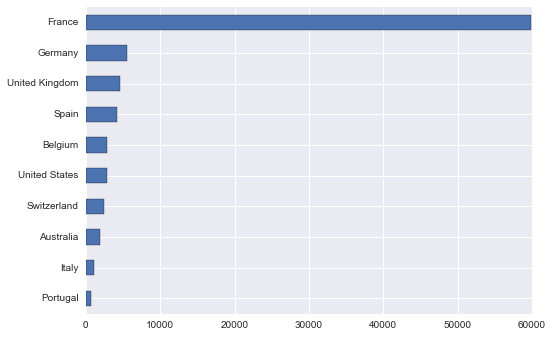

In [11]:
countries[:10][::-1].plot.barh()

In [12]:
food_countries['countries'].unique()

array(['France', 'en:FR', 'en:GB', 'United Kingdom', 'en:ES', 'en:SI',
       'en:DE', 'España', 'en:PT', 'United States', 'Germany', 'Usa',
       'France,United Kingdom', 'États-Unis', 'Royaume-Uni,France',
       'en:US', 'US', 'Switzerland', 'en:AU', 'en:CA', 'Australia',
       'en:CH', 'en:TR', 'Ireland', 'en:RE', 'en:TW', 'Deutschland',
       'en:BR', 'Belgique', 'en:DO', 'Australie', 'USA', 'en:SA', 'en:IQ',
       'Republica Moldova', 'Belgium', 'en:NC', 'Singapore', 'en:FI',
       'France,États-Unis', 'Singapore,New Zealand,Thailand,Australia',
       'en:PF', 'en:PA', 'en:MX', 'France,United States', 'Pays-Bas',
       'Canada', 'United states', 'France,Royaume-Uni', 'en:CN',
       'Republic of China', 'Spanien,Denmark', 'en:BE', 'Etats-Unis',
       'en:MQ', 'United Arab Emirates', 'Mexico', 'en:NO', 'en:HT',
       'en:SV', 'en:BH', 'en:LU', 'en:MA', 'en:AE',
       'United Kingdom,France', 'en:TT', 'Cuba', 'en:KW',
       'France,United Kingdom,United States', 'en:HK',

In [13]:
temp2 = food_countries['countries_en'].unique()
range2 = len(temp2)

In [14]:
# Word Cloud for all countries in the dataset
# Word Cloud needs one single string.

country_string = ''

# Extract DataFrame into string (adding spaces between each instance)

for i in range(range2):
    country_string += " " + temp2[i]
    
country_string    

" France United Kingdom Spain Slovenia Germany Portugal United States Switzerland Australia Canada Turkey Ireland Réunion Taiwan Brazil Belgium Dominican Republic Saudi Arabia Iraq Moldova New Caledonia Singapore Finland New Zealand Thailand French Polynesia Panama Mexico Netherlands China Denmark Martinique United Arab Emirates Norway Haiti El Salvador Bahrain Luxembourg Morocco Trinidad and Tobago Cuba Kuwait Hong Kong Philippines Aruba Mongolia United-states-of-america Italy Lebanon Austria Sweden Guinea Costa Rica Israel Saint Pierre and Miquelon fr:Quebec Czech Republic Indonesia Armenia Côte d'Ivoire Poland Greece India Ecuador Cambodia Chile Algeria European Union Pakistan Romania Japan Colombia Burundi Qatar fr:Europe French Guiana Peru Puerto Rico Monaco Honduras Egypt An Bulgaria Myanmar Guadeloupe Suriname Cameroon Virgin Islands of the United States Russia Tunisia Lithuania South Korea Senegal Belize es:Europe Other-العراق Togo Iceland Hungary Ελλάδα de:Weltweit Worldwide S

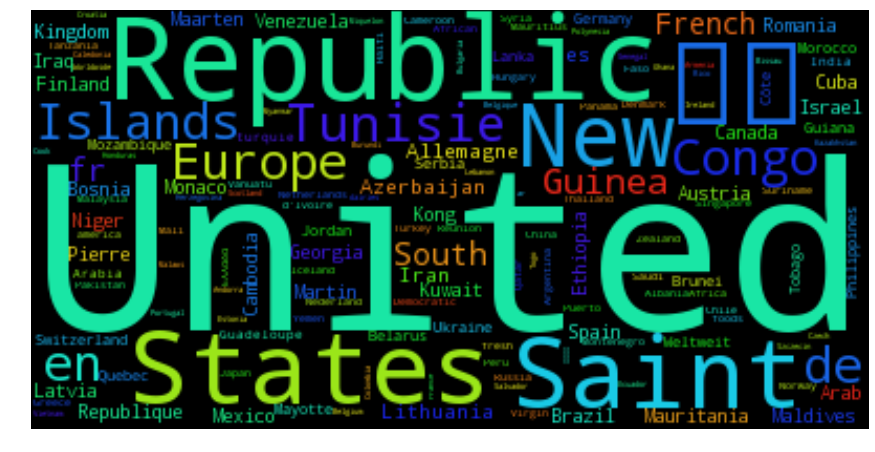

In [15]:
wordcloud = WordCloud().generate(country_string)
# Open a plot of the generated image.
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off");

### Top 10 Countries consuming alcohol

In [16]:
alcohol = main_data[main_data.alcohol_100g.notnull()]

In [17]:
alcohol[['product_name' ,'countries_en' , 'alcohol_100g']].head(10)

,product_name,countries_en,alcohol_100g
255,Fruit & Nut Granola,United States,0.0
257,Tims extra thick and crunchy jalapeno potato c...,United States,0.0
343,Kirsch,United Kingdom,43.0
387,Great Granny Crunchy Apple Chips,United States,0.0
411,Goldfish Flavor Blasted Xtra Cheddar,United States,0.0
642,Michelob ULTRA,United States,4.2
651,Go Lean Cereals,NaN,0.0
673,Zinfandel Trinity County 2009,United States,13.5
742,1% lowfat milk,United States,0.0
753,Safeway apple juice,United States,0.0


In [18]:
count_al = alcohol.countries_en.value_counts().head(10)
count_al

France            1921
Switzerland        533
United Kingdom     213
Germany            207
Spain               84
United States       84
Belgium             73
Belgium,France      40
Italy               25
Portugal            24
Name: countries_en, dtype: int64

Plot top 10 countries consuming Alcohol

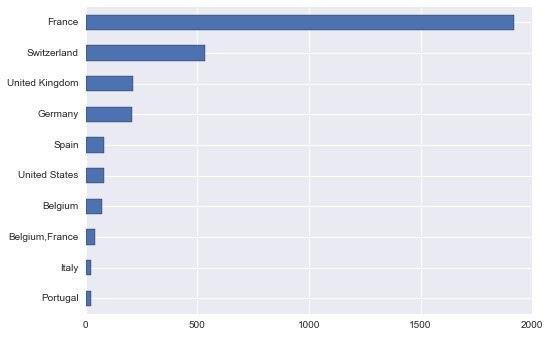

In [19]:
count_al[:10][::-1].plot.barh()

### Various Categories of food in dataset

In [20]:
foodCategory = main_data['categories_en'].value_counts(sort=True, dropna=False)
foodCategory

NaN                                                                                                                                                                                                                                                                                                                  26236
Sugary snacks,Biscuits and cakes,Biscuits                                                                                                                                                                                                                                                                              703
Plant-based foods and beverages,Plant-based foods,Breakfasts,Cereals and potatoes,Cereals and their products,Breakfast cereals                                                                                                                                                                                         487
Sugary snacks,Chocolates,Dark chocolates               

In [22]:
foodCategory1 = main_data['main_category_en'].value_counts(sort=True, dropna=False)
foodCategory1

NaN                                                 26278
Plant-based foods and beverages                     14562
Sugary snacks                                        7749
Beverages                                            7046
Dairies                                              4868
Groceries                                            4168
Meats                                                3266
Fresh foods                                          3185
Meals                                                1806
Salty snacks                                         1585
Canned foods                                         1547
Frozen foods                                         1383
Fruit juices                                         1329
Breakfasts                                            991
Seafood                                               866
Desserts                                              794
Spreads                                               709
Sandwiches    

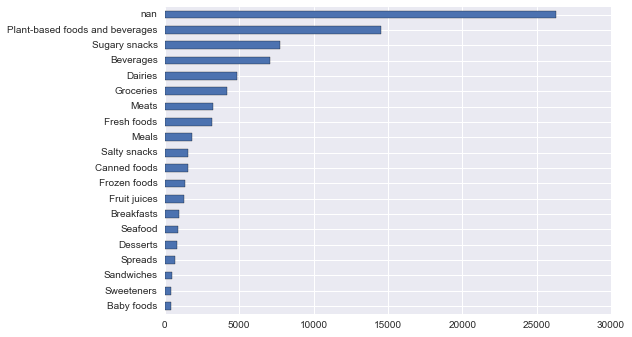

In [23]:
foodCategory1[:20][::-1].plot.barh()

### Average no of Additives per country

In [24]:
# Convert country names to lowercase
main_data.countries = main_data.countries.str.lower()

# Fix some of the names with multiple entries
main_data.loc[main_data['countries'] == 'en:fr','countries'] = 'france'
main_data.loc[main_data['countries'] == 'en:es','countries'] = 'spain'
main_data.loc[main_data['countries'] == 'en:gb','countries'] ='united kingdom'
main_data.loc[main_data['countries'] == 'en:uk','countries'] ='united kingdom'
main_data.loc[main_data['countries'] == 'españa','countries'] ='spain'
main_data.loc[main_data['countries'] == 'us','countries'] = 'united states'
main_data.loc[main_data['countries'] == 'en:us','countries'] ='united states'
main_data.loc[main_data['countries'] == 'usa','countries'] = 'united states'
main_data.loc[main_data['countries'] == 'en:cn','countries'] = 'canada'
main_data.loc[main_data['countries'] == 'en:au','countries'] = 'australia'
main_data.loc[main_data['countries'] == 'en:de','countries'] ='germany'
main_data.loc[main_data['countries'] == 'deutschland','countries'] ='germany'

In [25]:
# Pick some countries
countries = ['france','united kingdom','spain','germany','united states','australia','canada']

# Subset the data
sub_df = main_data[main_data.countries.isin(countries)]
sub_df = sub_df[sub_df.additives_n.notnull()]


#print(sub_df["countries"].value_counts())

# Get mean # of additives for each country
df_groupedby = sub_df.groupby(['countries']).mean().additives_n.reset_index()

# Convert to numpy array
df_np = np.array(df_groupedby)

# Sort the data descending by # of additives
df_np = df_np[df_np[:,1].argsort()[::-1]]

df_np

array([['united states', 2.169928825622776],
       ['france', 1.913405246506066],
       ['canada', 1.8857142857142857],
       ['united kingdom', 1.3056300268096515],
       ['spain', 0.9350355526826115],
       ['germany', 0.7886570358480471],
       ['australia', 0.4876543209876543]], dtype=object)

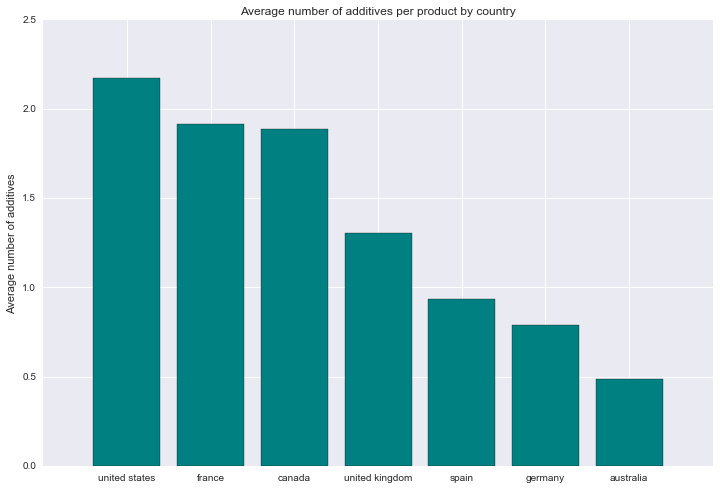

In [26]:
# Ready the plot
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
y_pos = np.arange(len(df_np[:,0]))
x_pos = df_np[:,1]
x_ticks = df_np[:,0]

# Make a barplot
plt.bar(y_pos, x_pos, align='center', color='teal')
plt.title('Average number of additives per product by country')
plt.xticks(y_pos, x_ticks)
plt.ylabel('Average number of additives') 
plt.show()

### Plot Additives as Word Cloud in Dataset

In [27]:
food_additives = main_data[['code','product_name','additives']]
food_additives = food_additives[food_additives.additives.notnull()]
food_additives.head()

,code,product_name,additives
5,0000000056434,diet lemonade by Sainsbury's,[ carbonated-water -> en:carbonated-water ] ...
6,0000001071894,Flute,[ wheat -> en:wheat ]
7,0000001471762,still Scottish water,[ water -> en:water ]
8,0000001798180,Fairtrade Ground Cinnamon,[ cinnamon -> en:cinnamon ]
9,0000005200016,lentilles vertes,[ lentilles-vertes -> fr:lentilles-vertes ] ...


In [28]:
food_additives.additives = food_additives.additives.str.lower()
food_add = splitDataFrameList(no_null_objects(food_additives, ["additives"]), "additives", ",")
count_additives = food_add["additives"].value_counts()


In [29]:
food_add.head()

,additives,code,product_name
0,[ carbonated-water -> en:carbonated-water ] ...,0000000056434,diet lemonade by Sainsbury's
1,[ wheat -> en:wheat ],0000001071894,Flute
2,[ water -> en:water ],0000001471762,still Scottish water
3,[ cinnamon -> en:cinnamon ],0000001798180,Fairtrade Ground Cinnamon
4,[ lentilles-vertes -> fr:lentilles-vertes ] ...,0000005200016,lentilles vertes


In [159]:
# To check if words are in the english dictionary. Credit: http://stackoverflow.com/questions/29099621/how-to-find-out-wether-a-word-exists-in-english-using-nltk
import nltk
#english_vocab = set(w.lower() for w in nltk.corpus.words.words())

# WordCloud must contain input in one long string
#additive_string = ''

# Extract DataFrame into string (adding spaces between each instance)
#for additive in range(len(food_add)):
#    additive_string += " " + str(food_add[additive])

# Clean string to leave only letters
#additive_string = ''.join([char for char in additive_string if (char.isalpha() or char == ' ')])

# Leave only words in english language (eliminates need for further cleaning)
#temp_list = additive_string.split(' ')
#additive_string = ' '.join([word for word in temp_list if word in english_vocab])

# print(additive_string)

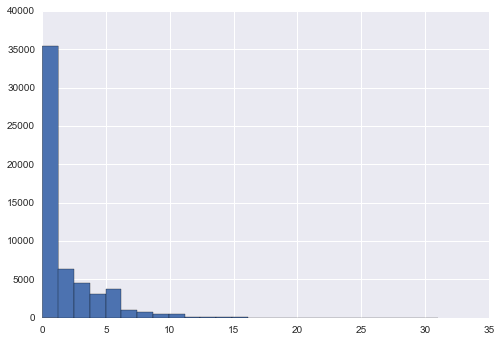

In [30]:
main_data.additives_n.hist(bins=25)

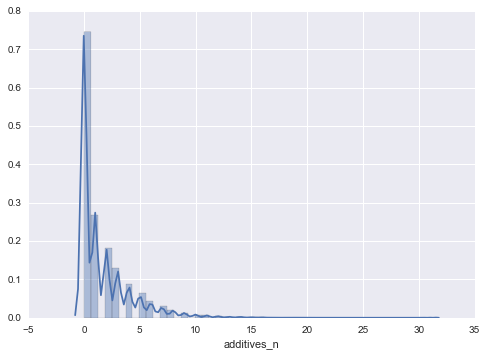

In [31]:
add_temp = main_data['additives_n']
add_temp = add_temp.dropna() 

sns.distplot(add_temp)

In [78]:
main_add = main_data[['product_name', 'additives_n' , 'additives_en']]
main_add = main_add[main_add.additives_en.notnull()] 

In [79]:
main_add.head()

,product_name,additives_n,additives_en
5,diet lemonade by Sainsbury's,4.0,"E330 - Citric acid,E331iii - Trisodium citrate..."
11,Biscuits sablés fourrage au cacao,3.0,"E1400 - Dextrin,E322 - Lecithins,E503 - Ammoni..."
13,Sirops pour ganache macarons,4.0,"E330 - Citric acid,E171 - Titanium dioxide,E21..."
17,Luxury Christmas Pudding,5.0,"E170 - Calcium carbonate,E375 - Nicotinic acid..."
18,Luxury Christmas Pudding,5.0,"E170 - Calcium carbonate,E375 - Nicotinic acid..."


In [80]:
len(main_add)

30022

In [81]:
food_enos = splitDataFrameList(no_null_objects(main_add, ["additives_en"]), "additives_en", ",")
count_enos = food_enos["additives_en"].value_counts()
count_enos

E330 - Citric acid                              8257
E322 - Lecithins                                5569
E300 - Ascorbic acid                            4513
E250 - Sodium nitrite                           3349
E500 - Sodium carbonates                        3158
E415 - Xanthan gum                              3083
E471 - Mono- and diglycerides of fatty acids    3025
E14XX                                           2429
E412 - Guar gum                                 2418
E407 - Carrageenan                              2287
E202 - Potassium sorbate                        2261
E440 - Pectins                                  2206
E450 - Diphosphates                             2074
E301 - Sodium ascorbate                         1654
E331 - Sodium citrates                          1478
E503 - Ammonium carbonates                      1385
E160a - Alpha-carotene                          1367
E621 - Monosodium glutamate                     1242
E410 - Locust bean gum                        

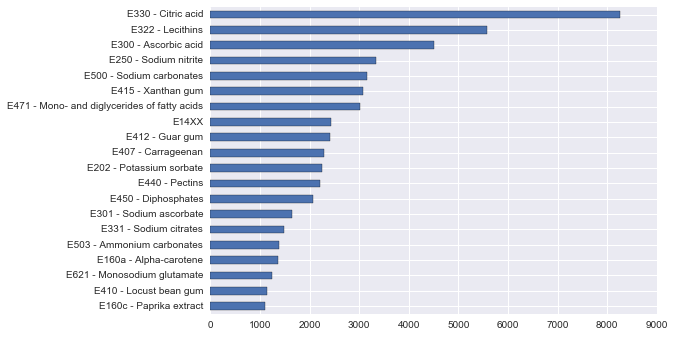

In [82]:
count_enos[:20][::-1].plot.barh()

In [83]:
main_add = main_add[main_add.product_name.notnull()]

In [84]:
main_add.head()

,product_name,additives_n,additives_en
5,diet lemonade by Sainsbury's,4.0,"E330 - Citric acid,E331iii - Trisodium citrate..."
11,Biscuits sablés fourrage au cacao,3.0,"E1400 - Dextrin,E322 - Lecithins,E503 - Ammoni..."
13,Sirops pour ganache macarons,4.0,"E330 - Citric acid,E171 - Titanium dioxide,E21..."
17,Luxury Christmas Pudding,5.0,"E170 - Calcium carbonate,E375 - Nicotinic acid..."
18,Luxury Christmas Pudding,5.0,"E170 - Calcium carbonate,E375 - Nicotinic acid..."


#### Check if Additives in the dataset are among dangerous ones
#http://www.shutterstock.com/pic-243048142/stock-vector-the-table-of-harmful-food-additives.html

In [85]:
main_add['high_dang'] = main_add['additives_en'].str.match('E123|E510|E513|E527|E621',case = '1', na='0')
main_add.high_dang = main_add.high_dang.astype(int)

In [86]:
main_add['dangerous'] = main_add['additives_en'].str.match('E102|E110|E120|E127|E155|E180',case = '1', na='0')
main_add.dangerous = main_add.dangerous.astype(int)

In [87]:
main_add['cancerous'] = main_add['additives_en'].str.match('E131|E142|E153|E210|E212|E213',case = '1', na='0')
main_add.cancerous = main_add.cancerous.astype(int)

In [88]:
main_add['gastric_dis'] = main_add['additives_en'].str.match('E338|E339|E340|E341|E343|E450',case = '1', na='0')
main_add.gastric_dis = main_add.gastric_dis.astype(int)

In [89]:
main_add['child_dang'] = main_add['additives_en'].str.match('E270',case = '1', na='0')
main_add.child_dang = main_add.child_dang.astype(int)

In [95]:
main_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29879 entries, 5 to 91027
Data columns (total 8 columns):
product_name    29879 non-null object
additives_n     29879 non-null float64
additives_en    29879 non-null object
high_dang       29879 non-null int64
dangerous       29879 non-null int64
cancerous       29879 non-null int64
gastric_dis     29879 non-null int64
child_dang      29879 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.1+ MB


Total No of items that could be Cancerous in dataset

In [100]:
len(main_add[main_add['cancerous'] == 1])

90

Total No of items that could be Highly Dangerous in dataset

In [101]:
len(main_add[main_add['high_dang'] == 1])

584

Total No of items that could cause Gastric Disturbance in dataset

In [102]:
len(main_add[main_add['gastric_dis'] == 1])

1046

Total No of items that could be Dangerous in dataset

In [103]:
len(main_add[main_add['dangerous'] == 1])

304

Total No of items that are Dangerous to Children in dataset

In [104]:
len(main_add[main_add['child_dang'] == 1])

356

In [109]:
total_values = [main_add['cancerous'].sum(),main_add['high_dang'].sum(),main_add['dangerous'].sum(),
                main_add['gastric_dis'].sum(),main_add['child_dang'].sum()]
total_values

[90, 584, 304, 1046, 356]

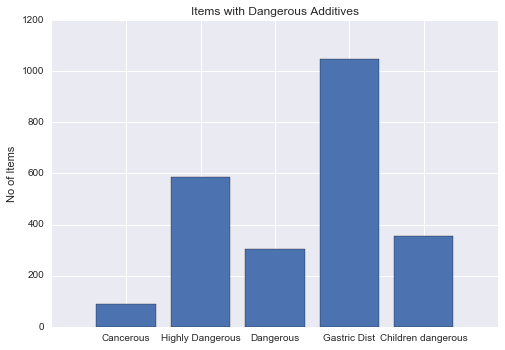

In [116]:
add_type = ['Cancerous','Highly Dangerous','Dangerous','Gastric Dist','Children dangerous']

y_pos = np.arange(len(add_type))


plt.bar(y_pos, total_values, align='center', alpha=1.0)
plt.title('Items with Dangerous Additives')
plt.xticks(y_pos, add_type)
plt.ylabel('No of Items')
    
plt.show()

### Find Allergens mentioned in dataset - Plot Wordcloud for Allergens

In [39]:
# Find the allergens for the products
food_allergens = main_data[['product_name','allergens','allergens_en']]
food_allergens = food_allergens[food_allergens.allergens.notnull()]
food_allergens.head()


,product_name,allergens,allergens_en
11,Biscuits sablés fourrage au cacao,"Blé, Beurre, Oeufs, Noisette",NaN
17,Luxury Christmas Pudding,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea...",NaN
25,Salsa de mostaza,mostaza,NaN
67,Stem Ginger Dunkers,"blé, gluten, blé, lait, avoine, gluten, lait",NaN
87,Pizza Parlanno,"Wheat, Milk, Milk",NaN


In [40]:
len(food_allergens[food_allergens['allergens'].notnull()])

20240

In [41]:
food_allergens.allergens = food_allergens.allergens.str.lower()
food_all = splitDataFrameList(no_null_objects(food_allergens, ["allergens"]), "allergens", ",")
countries_allergens = food_all["allergens"].value_counts()

In [42]:
countries_allergens.head(25)

 lait          10150
 blé            6451
blé             4962
lait            4115
 soja           3476
 beurre         2057
 moutarde       1584
 gluten         1448
 lactose        1414
 crème          1345
 oeufs          1236
 orge           1184
 œuf            1062
 oeuf           1044
 œufs           1020
soja             895
 céleri          676
 noisettes       632
 lactosérum      619
 milk            606
 fromage         551
 sulfites        549
céleri           492
 poisson         481
gluten           478
Name: allergens, dtype: int64

In [43]:
temp1 = food_all['allergens'].unique()
len(countries_allergens)
range1 = len(temp1)
range1

1893

In [44]:
# Word Cloud for all allergens in the dataset
# Word Cloud needs one single string.

allergens_string = ''

# Extract DataFrame into string (adding spaces between each instance)

for i in range(range1):
    allergens_string += " " + temp1[i]

In [45]:
allergens_string

" blé  beurre  oeufs  noisette wheat flour  milk  walnuts  almonds  nut  wheat flour  barley mostaza  gluten  blé  lait  avoine wheat  wheat  cheese  butter  cream lait milk  soya almonds  hazelnuts  lactose hazelnuts  soy  whey  soybean  rye soy  soybeans  nuts soybean oats  oat  pecans  sesame peanut  peanut soybeans  soja peanuts fish  celery  eggs  egg  macadamia nuts  tree nut  pecan  macadamia  walnut  cashew  almond  coconut  milkfat  huile de beurre  noix de pécan  fruits à coques moulus  pécan  noix  cajou  amande soja  lait écrémé  noix de macadamia  fruits à coque  poudre de lait entier  fruit à coque moulus  fromage  céleri  crème  lactosérum amandes pistaches noix cream  peanuts almond  sulphites  dairy sardines eggs  mustard  buttermilk  lactic acid anchois coconut butter lactose cashews  cashews froment oat sulfites cacahuètes  soya lecithin  arachide  cacahuètes  cacahuète cacahuetes  cacahuetes  ble sweet cream  yogurt  oats milkfat malt avoine cheese celery dairy mout

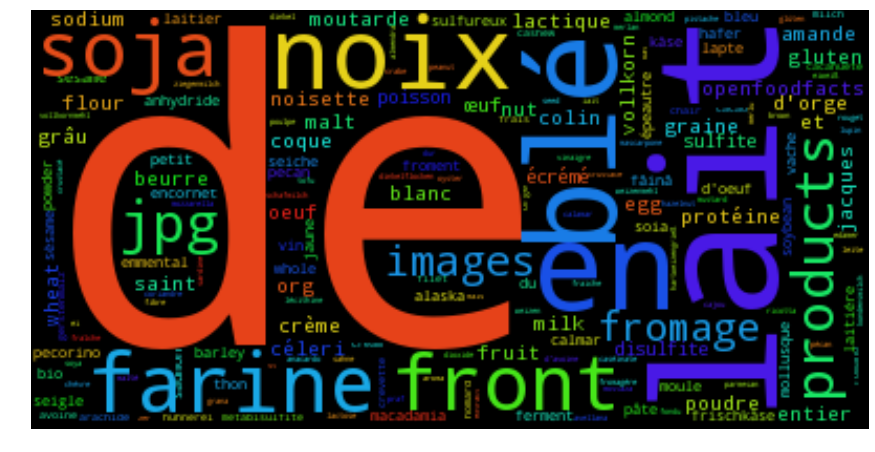

In [46]:
wordcloud = WordCloud().generate(allergens_string)
# Open a plot of the generated image.
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off");

In [47]:
main_cat = main_data[['product_name','pnns_groups_1','pnns_groups_2','categories_en','main_category_en']]

In [48]:
main_cat = main_cat[main_cat.categories_en.notnull()]
main_cat

,product_name,pnns_groups_1,pnns_groups_2,categories_en,main_category_en
0,Filet de bœuf,unknown,unknown,fr:Filet-de-boeuf,fr:Filet-de-boeuf
6,Flute,Cereals and potatoes,Bread,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages
9,lentilles vertes,Cereals and potatoes,Legumes,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages
10,NaN,unknown,unknown,fr:Root-bier,fr:Root-bier
11,Biscuits sablés fourrage au cacao,Sugary snacks,Biscuits and cakes,"Sugary snacks,Biscuits and cakes,Biscuits,fr:S...",Sugary snacks
12,Thé de Noël aromatisé orange-cannelle,Beverages,Non-sugared beverages,"Plant-based foods and beverages,Beverages,Plan...",Beverages
13,Sirops pour ganache macarons,unknown,unknown,"Syrups,fr:Sirops-pour-ganache",Syrups
14,เล็บมือนาง (ตีนไก่ ),unknown,unknown,Chicken-feet,Chicken-feet
17,Luxury Christmas Pudding,unknown,unknown,"Desserts,Christmas Puddings,Puddings",Desserts
18,Luxury Christmas Pudding,Sugary snacks,Biscuits and cakes,"Sugary snacks,Desserts,Biscuits and cakes,Cake...",Sugary snacks
